In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from taxi_pakage import *

In [3]:
taxi = pd.read_csv('edited_taxi.csv')
feature_n, features = get_features(taxi)

In [4]:
test = dmatrix("{}".format(features), taxi, return_type ="dataframe")
test = test.drop(["id", "store_and_fwd_flag", "holiday_Fri"], axis = 1)
# test = test.drop(["dropoff_longitude", "dropoff_latitude", 
#                       "pickup_longitude", "pickup_latitude"], axis =1) - 얘네 넣는게 낫다는 말이 있어서 넣었습니다.

In [5]:
feature_n, features = get_features(test, 2, -3, scale=True)
feature_n, features

(9,
 'scale(passenger_count) + scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time)')

In [6]:
test = dmatrix("trip_duration + vendor_id +weekday + holiday + {}".format(features), test, return_type ="dataframe")

In [7]:
test = test.rename(index=str, 
            columns={'scale(passenger_count)':'passenger_count', 
                         'scale(pickup_longitude)':'pickup_longitude',
                         'scale(pickup_latitude)':'pickup_latitude', 
                         'scale(dropoff_longitude)':'dropoff_longitude',
                         'scale(dropoff_latitude)':'dropoff_latitude', 
                         'scale(dist)':'dist',
                         'scale(pick_date)' : 'pick_date',
                         'scale(pick_time)'  : 'pick_time', 
                         'scale(drop_time)' : 'drop_time',
                    }
           )

In [8]:
test.to_csv('scaled.csv', index=False)

In [9]:
feature_n, features = get_features(test, 5, scale=False)
feature_n, features

(9,
 'passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time')

In [10]:
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()

In [11]:
test, Dropped = erase_outlier_np(result, test, feature_n, category=True, dropped=True)

In [12]:
len(test), len(taxi)

(1456375, 1458644)

In [13]:
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test) #1 번제거
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 1.357e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:29:46   Log-Likelihood:            -1.0825e+07
No. Observations:             1456375   AIC:                         2.165e+07
Df Residuals:                 1456357   BIC:                         2.165e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(vendor_id)[1.0]   803.6557      1.048    766.644      0.000     801.601     805.710
C(vendor_id)[2.0]   803.8426      1.031    779.571      0.000     801.822     805.864
C(weekday)[T.1.0]    62.2087      1.334     46.639      0.000      59.594      64.823
C(weekday)[T.2.0]    86.8402      1.323     65.644      0.000      84.247      89.433
C(weekday)[T.3.0]    94.0122      1.311     71.696      0.000      91.442      96.582
C(weekday)[T.4.0]    78.5344      1.285     61.100      0.000      76.015      81.054
C(weekday)[T.5.0]    76.9367      2.404     32.007      0.000      72.225      81.648
C(weekday)[T.6.0]    14.7501      2.424      6.084      0.000       9.998      19.502
C(holiday)[T.1.0]   -86.3535      2.275    -37.961      0.000     -90.812     -81.895
passenger_count       5.1775      0.354     14.618      0.000       4.483       5.872
pickup_longitude    -38.6094      0.739    -52.216      0.000     -40.059     -37.160
pickup_latitude      32.4647      0.461     70.469      0.000      31.562      33.368
dropoff_longitude   -66.1639      0.734    -90.164      0.000     -67.602     -64.726
dropoff_latitude    -46.8449      0.425   -110.106      0.000     -47.679     -46.011
dist                583.5142      0.476   1226.628      0.000     582.582     584.447
pick_date            28.5456      0.342     83.346      0.000      27.874      29.217
pick_time           -39.9043      0.939    -42.501      0.000     -41.744     -38.064
drop_time            67.5910      0.939     71.963      0.000      65.750      69.432
==============================================================================
Omnibus:                   784286.453   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22084704.742
Skew:                           2.051   Prob(JB):                         0.00
Kurtosis:                      21.631   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# scale된 dist와 좌표값4개를 같이 넣어도 컨디션이 0.1만 증가함

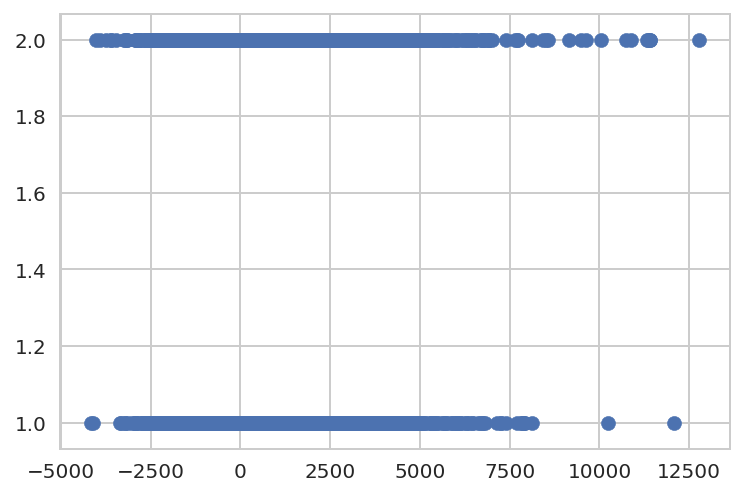

In [13]:
plt.scatter(result.resid, test['vendor_id'])
plt.show()

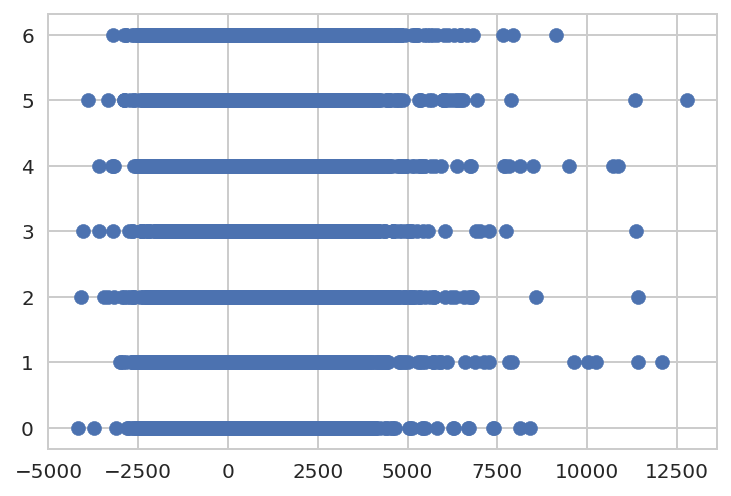

In [14]:
plt.scatter(result.resid, test['weekday'])
plt.show()

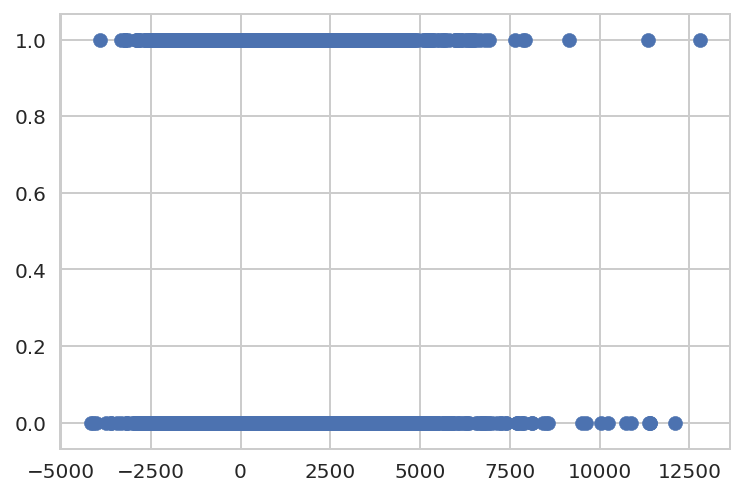

In [15]:
plt.scatter(result.resid, test['holiday'])
plt.show()

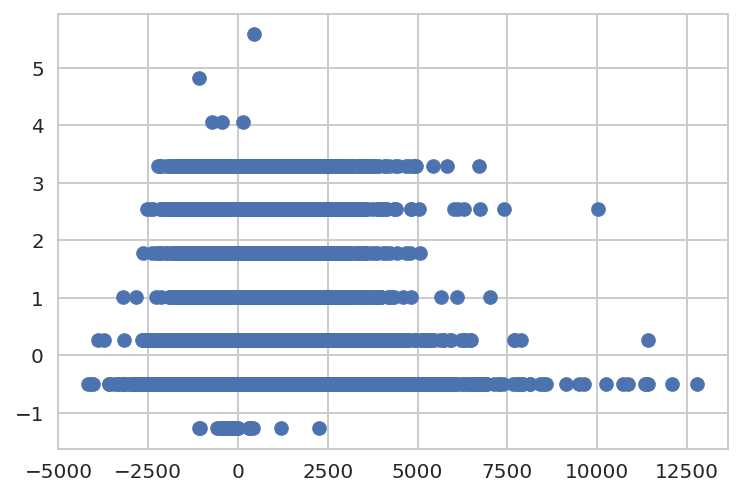

In [16]:
plt.scatter(result.resid, test['passenger_count'])
plt.show()

위 4개는 카테고리거나, 카테고리와 다를바 없는 features

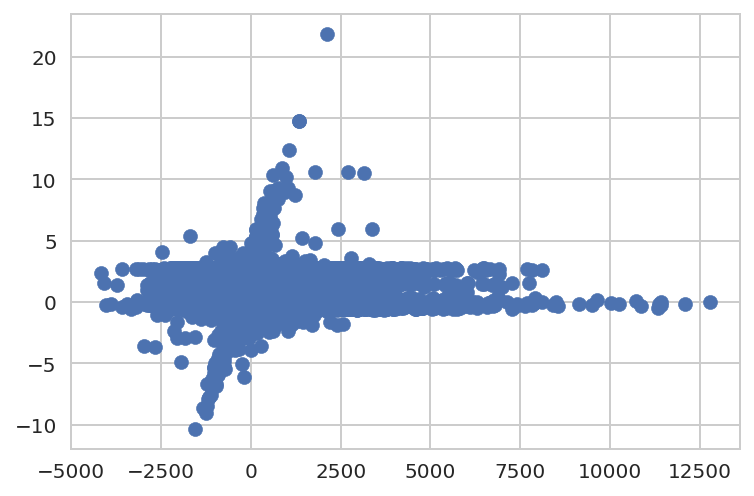

In [17]:
plt.scatter(result.resid, test['pickup_longitude'])
plt.show()

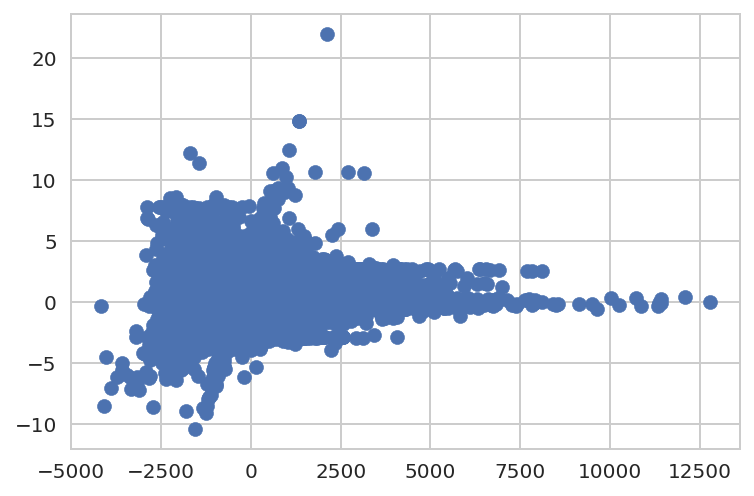

In [18]:
plt.scatter(result.resid, test['dropoff_longitude'])
plt.show()

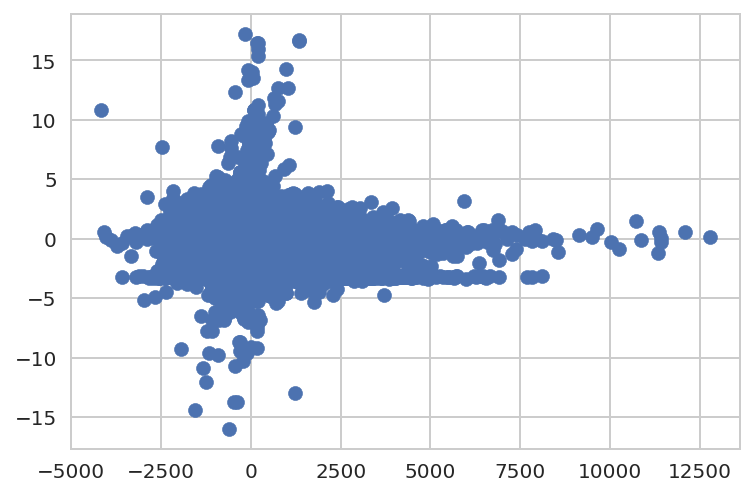

In [19]:
plt.scatter(result.resid, test['pickup_latitude'])
plt.show()

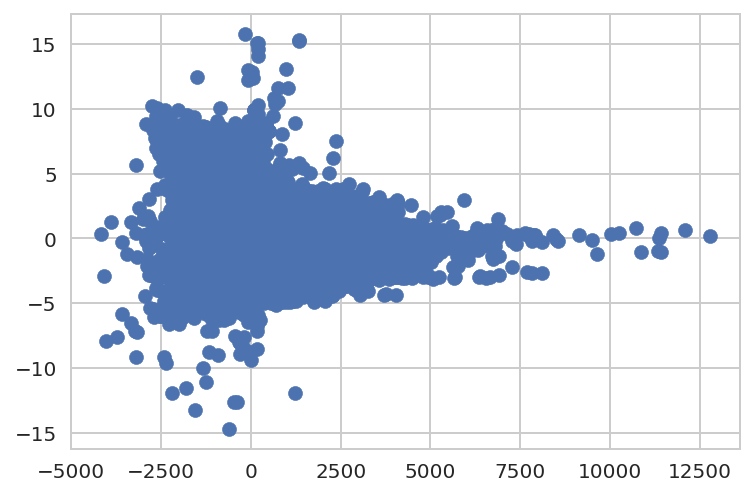

In [20]:
plt.scatter(result.resid, test['dropoff_latitude'])
plt.show()

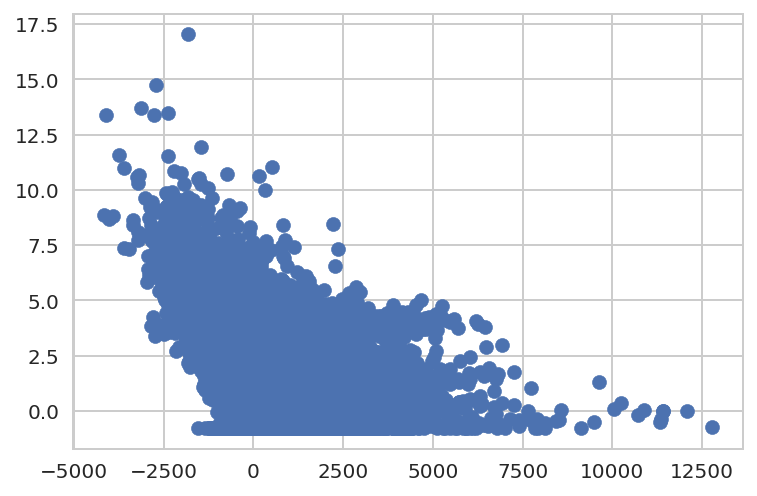

In [21]:
plt.scatter(result.resid, test['dist'])
plt.show()

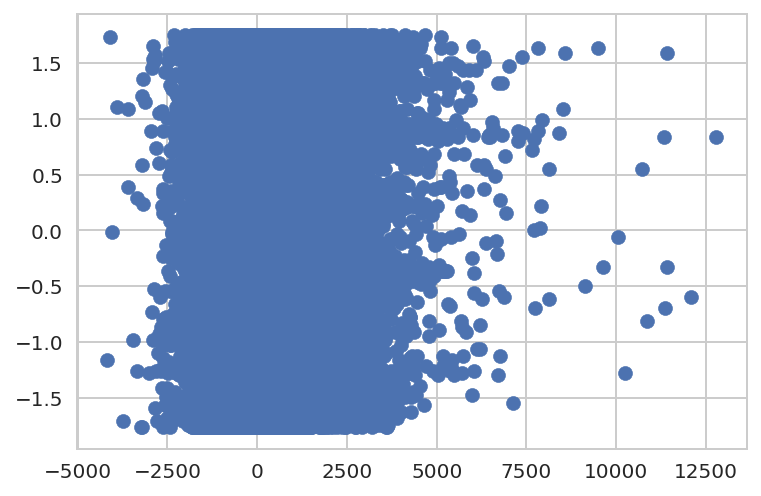

In [22]:
plt.scatter(result.resid, test['pick_date'])
plt.show()

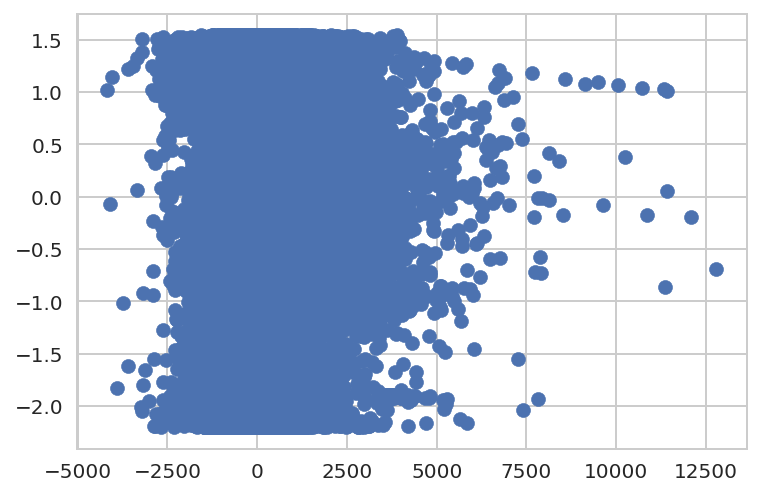

In [23]:
plt.scatter(result.resid, test['pick_time'])
plt.show()

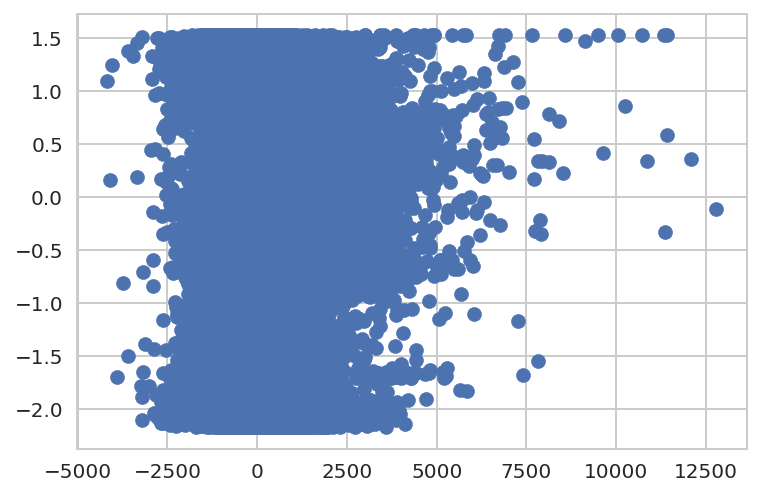

In [24]:
plt.scatter(result.resid, test['drop_time'])
plt.show()

In [14]:
test, Dropped = erase_outlier_np(result, test, feature_n, category=True, dropped=True) #2번제거
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 1.759e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:30:20   Log-Likelihood:            -9.6543e+06
No. Observations:             1369386   AIC:                         1.931e+07
Df Residuals:                 1369368   BIC:                         1.931e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(vendor_id)[1.0]   792.7218      0.741   1070.502      0.000     791.270     794.173
C(vendor_id)[2.0]   792.2608      0.729   1087.168      0.000     790.832     793.689
C(weekday)[T.1.0]    52.1026      0.940     55.427      0.000      50.260      53.945
C(weekday)[T.2.0]    67.8359      0.933     72.709      0.000      66.007      69.664
C(weekday)[T.3.0]    73.7304      0.925     79.700      0.000      71.917      75.544
C(weekday)[T.4.0]    59.8465      0.908     65.929      0.000      58.067      61.626
C(weekday)[T.5.0]    89.8434      1.725     52.069      0.000      86.462      93.225
C(weekday)[T.6.0]    31.5958      1.740     18.153      0.000      28.184      35.007
C(holiday)[T.1.0]   -93.9018      1.643    -57.151      0.000     -97.122     -90.682
passenger_count       1.5520      0.251      6.190      0.000       1.061       2.043
pickup_longitude    -76.7336      0.636   -120.673      0.000     -77.980     -75.487
pickup_latitude      40.0061      0.372    107.461      0.000      39.276      40.736
dropoff_longitude   -80.4871      0.672   -119.777      0.000     -81.804     -79.170
dropoff_latitude    -46.5946      0.359   -129.844      0.000     -47.298     -45.891
dist                644.5167      0.419   1537.171      0.000     643.695     645.339
pick_date            17.1776      0.241     71.222      0.000      16.705      17.650
pick_time           -63.0627      0.826    -76.321      0.000     -64.682     -61.443
drop_time            88.3951      0.830    106.519      0.000      86.769      90.022
==============================================================================
Omnibus:                   142126.444   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198731.750
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                       3.865   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
test, Dropped = erase_outlier_np(result, test, feature_n, category=True, dropped=True) #3번제거
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                 1.924e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:30:52   Log-Likelihood:            -8.8225e+06
No. Observations:             1285043   AIC:                         1.765e+07
Df Residuals:                 1285025   BIC:                         1.765e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(vendor_id)[1.0]   785.2067      0.639   1229.077      0.000     783.955     786.459
C(vendor_id)[2.0]   784.4554      0.629   1247.448      0.000     783.223     785.688
C(weekday)[T.1.0]    42.8684      0.808     53.074      0.000      41.285      44.451
C(weekday)[T.2.0]    55.4633      0.802     69.146      0.000      53.891      57.035
C(weekday)[T.3.0]    60.8814      0.796     76.512      0.000      59.322      62.441
C(weekday)[T.4.0]    51.6571      0.781     66.153      0.000      50.127      53.188
C(weekday)[T.5.0]    91.4523      1.508     60.658      0.000      88.497      94.407
C(weekday)[T.6.0]    38.0420      1.520     25.021      0.000      35.062      41.022
C(holiday)[T.1.0]   -94.5668      1.442    -65.581      0.000     -97.393     -91.741
passenger_count      -0.0921      0.217     -0.425      0.671      -0.516       0.332
pickup_longitude    -83.1745      0.637   -130.614      0.000     -84.423     -81.926
pickup_latitude      43.1002      0.352    122.482      0.000      42.410      43.790
dropoff_longitude   -79.4707      0.667   -119.113      0.000     -80.778     -78.163
dropoff_latitude    -46.5551      0.343   -135.555      0.000     -47.228     -45.882
dist                681.5729      0.411   1657.447      0.000     680.767     682.379
pick_date            12.0242      0.207     58.040      0.000      11.618      12.430
pick_time          -100.4389      0.960   -104.604      0.000    -102.321     -98.557
drop_time           125.2645      0.968    129.465      0.000     123.368     127.161
==============================================================================
Omnibus:                    74271.522   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87903.933
Skew:                           0.638   Prob(JB):                         0.00
Kurtosis:                       3.116   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

passenger_count의 계수가 음수로 바뀌고 유의확률이 67%로 급상승 - 아웃라이어를 더 제거하면 다시 내려갈지도?
- $R^2$값은 증가

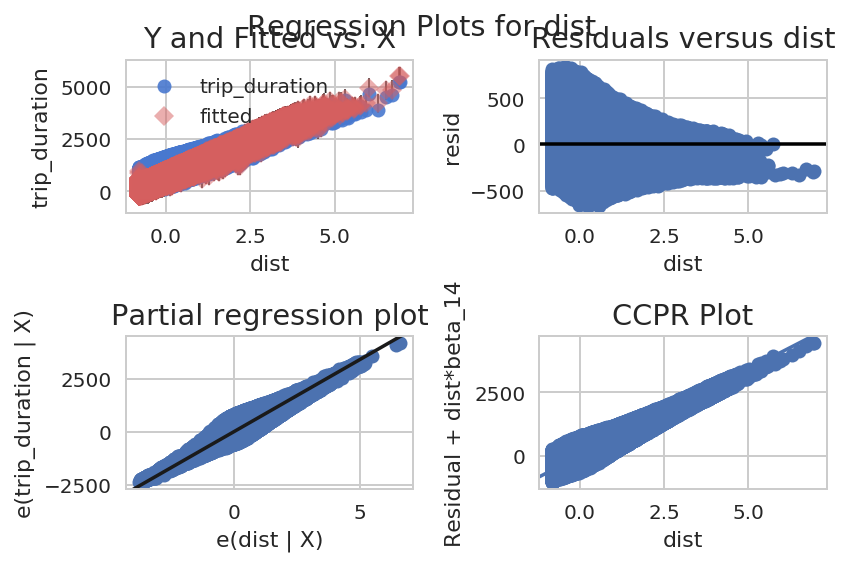

In [27]:
fig = sm.graphics.plot_regress_exog(result, "dist")
plt.show()

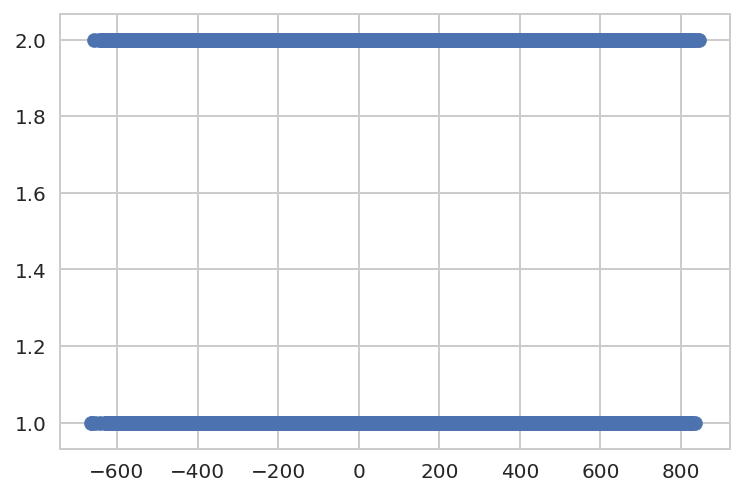

In [28]:
plt.scatter(result.resid, test['vendor_id'])
plt.show()

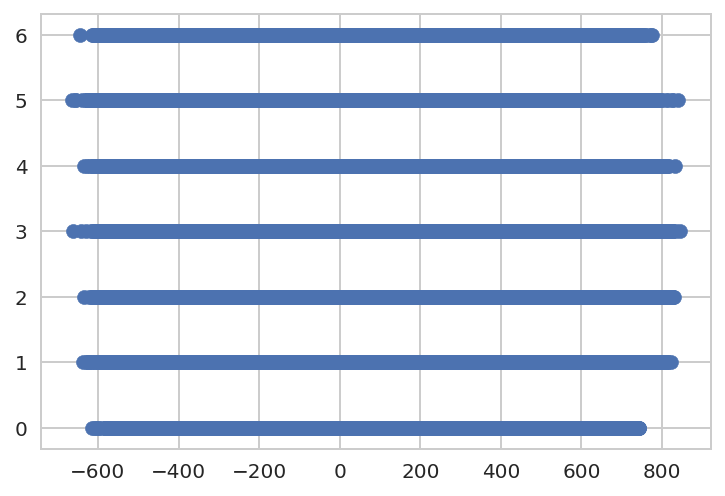

In [29]:
plt.scatter(result.resid, test['weekday'])
plt.show()

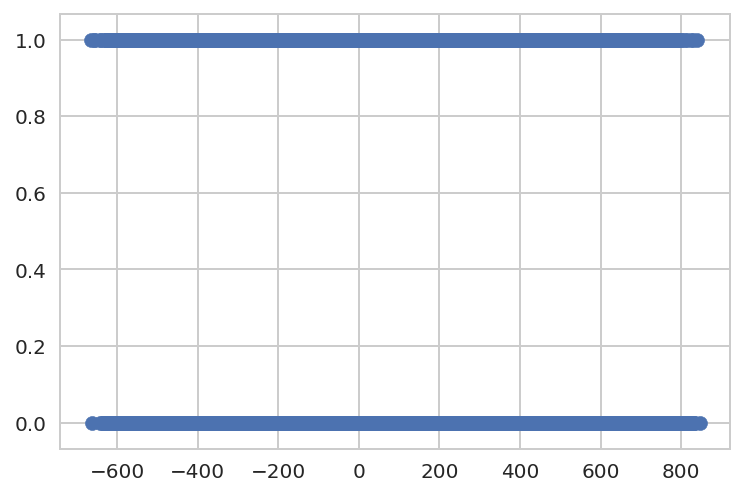

In [30]:
plt.scatter(result.resid, test['holiday'])
plt.show()

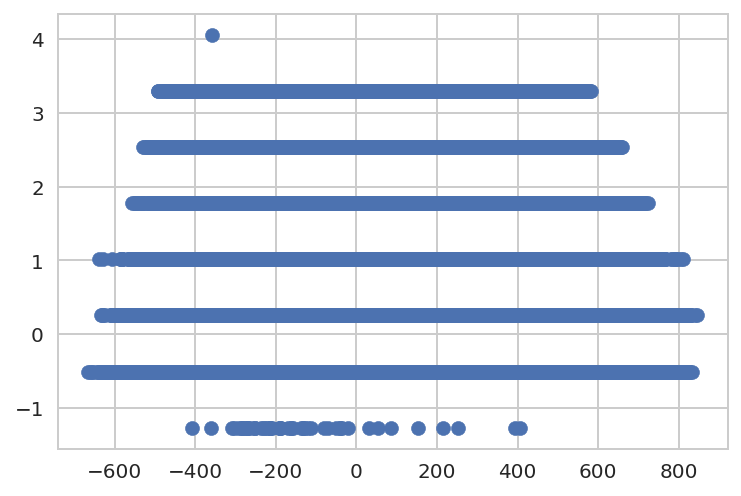

In [31]:
plt.scatter(result.resid, test['passenger_count'])
plt.show()

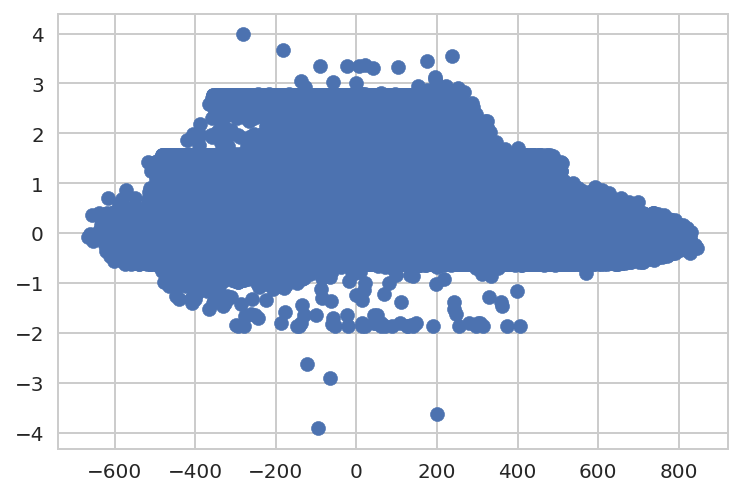

In [32]:
plt.scatter(result.resid, test['pickup_longitude'])
plt.show()

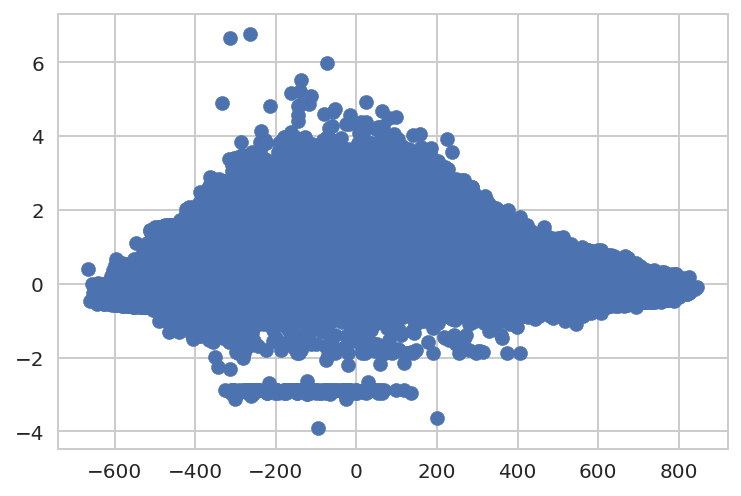

In [33]:
plt.scatter(result.resid, test['dropoff_longitude'])
plt.show()

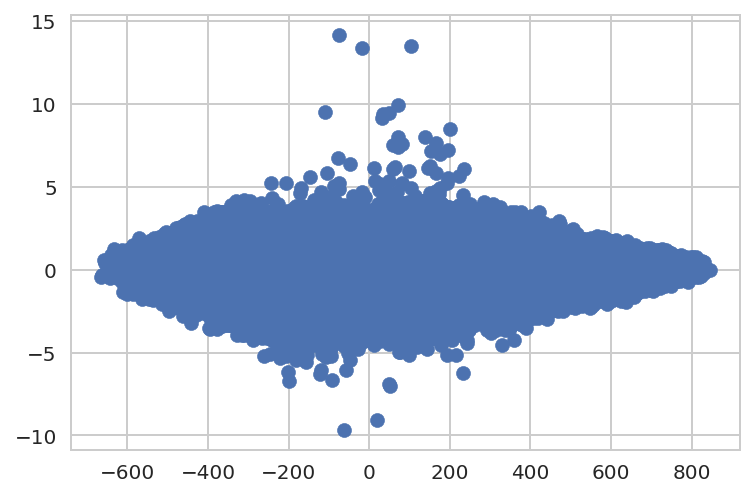

In [34]:
plt.scatter(result.resid, test['pickup_latitude'])
plt.show()

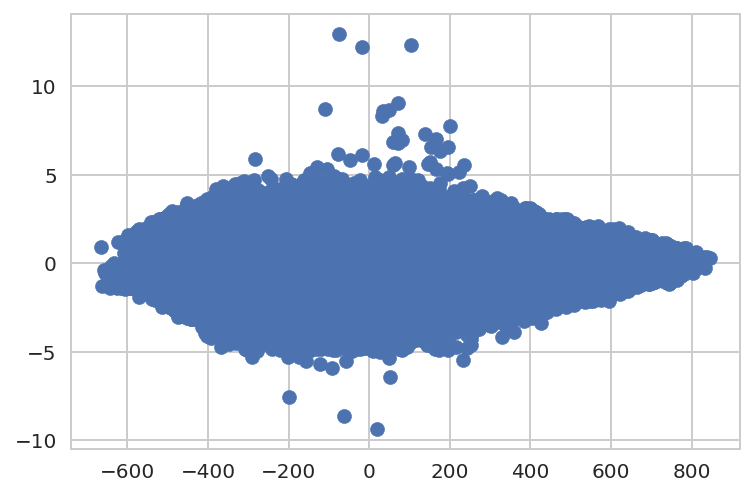

In [35]:
plt.scatter(result.resid, test['dropoff_latitude'])
plt.show()

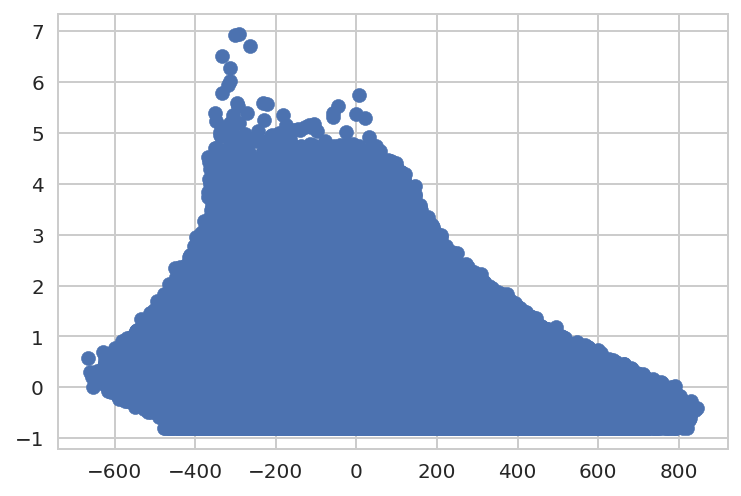

In [36]:
plt.scatter(result.resid, test['dist'])
plt.show()

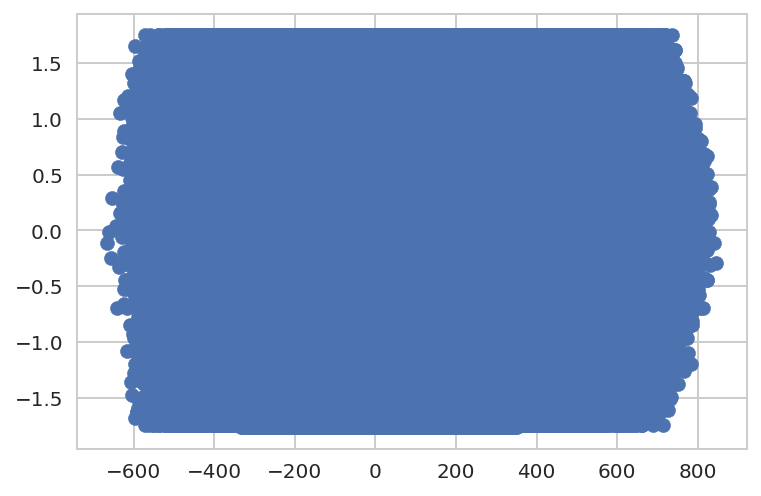

In [37]:
plt.scatter(result.resid, test['pick_date'])
plt.show()

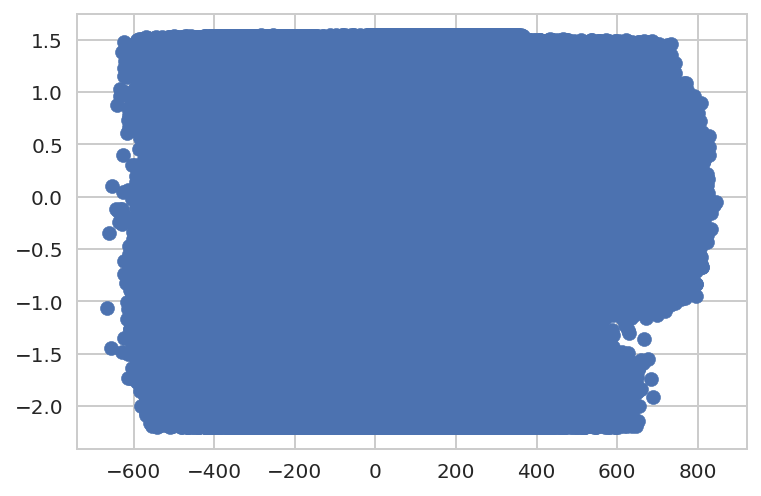

In [38]:
plt.scatter(result.resid, test['pick_time'])
plt.show()

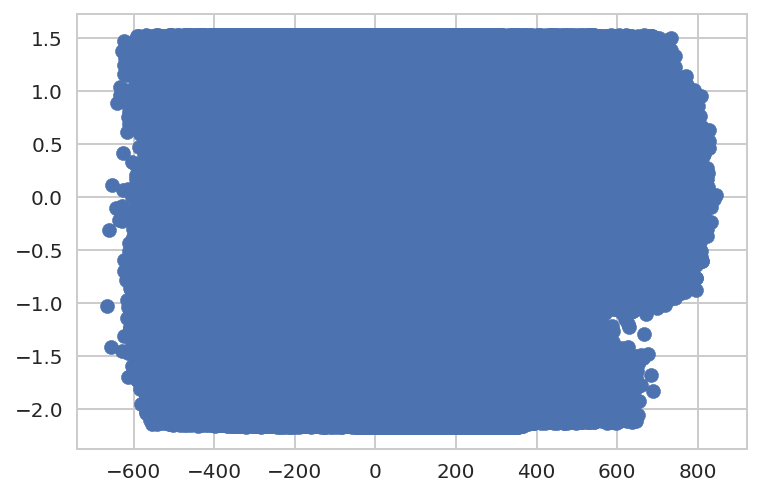

In [39]:
plt.scatter(result.resid, test['drop_time'])
plt.show()

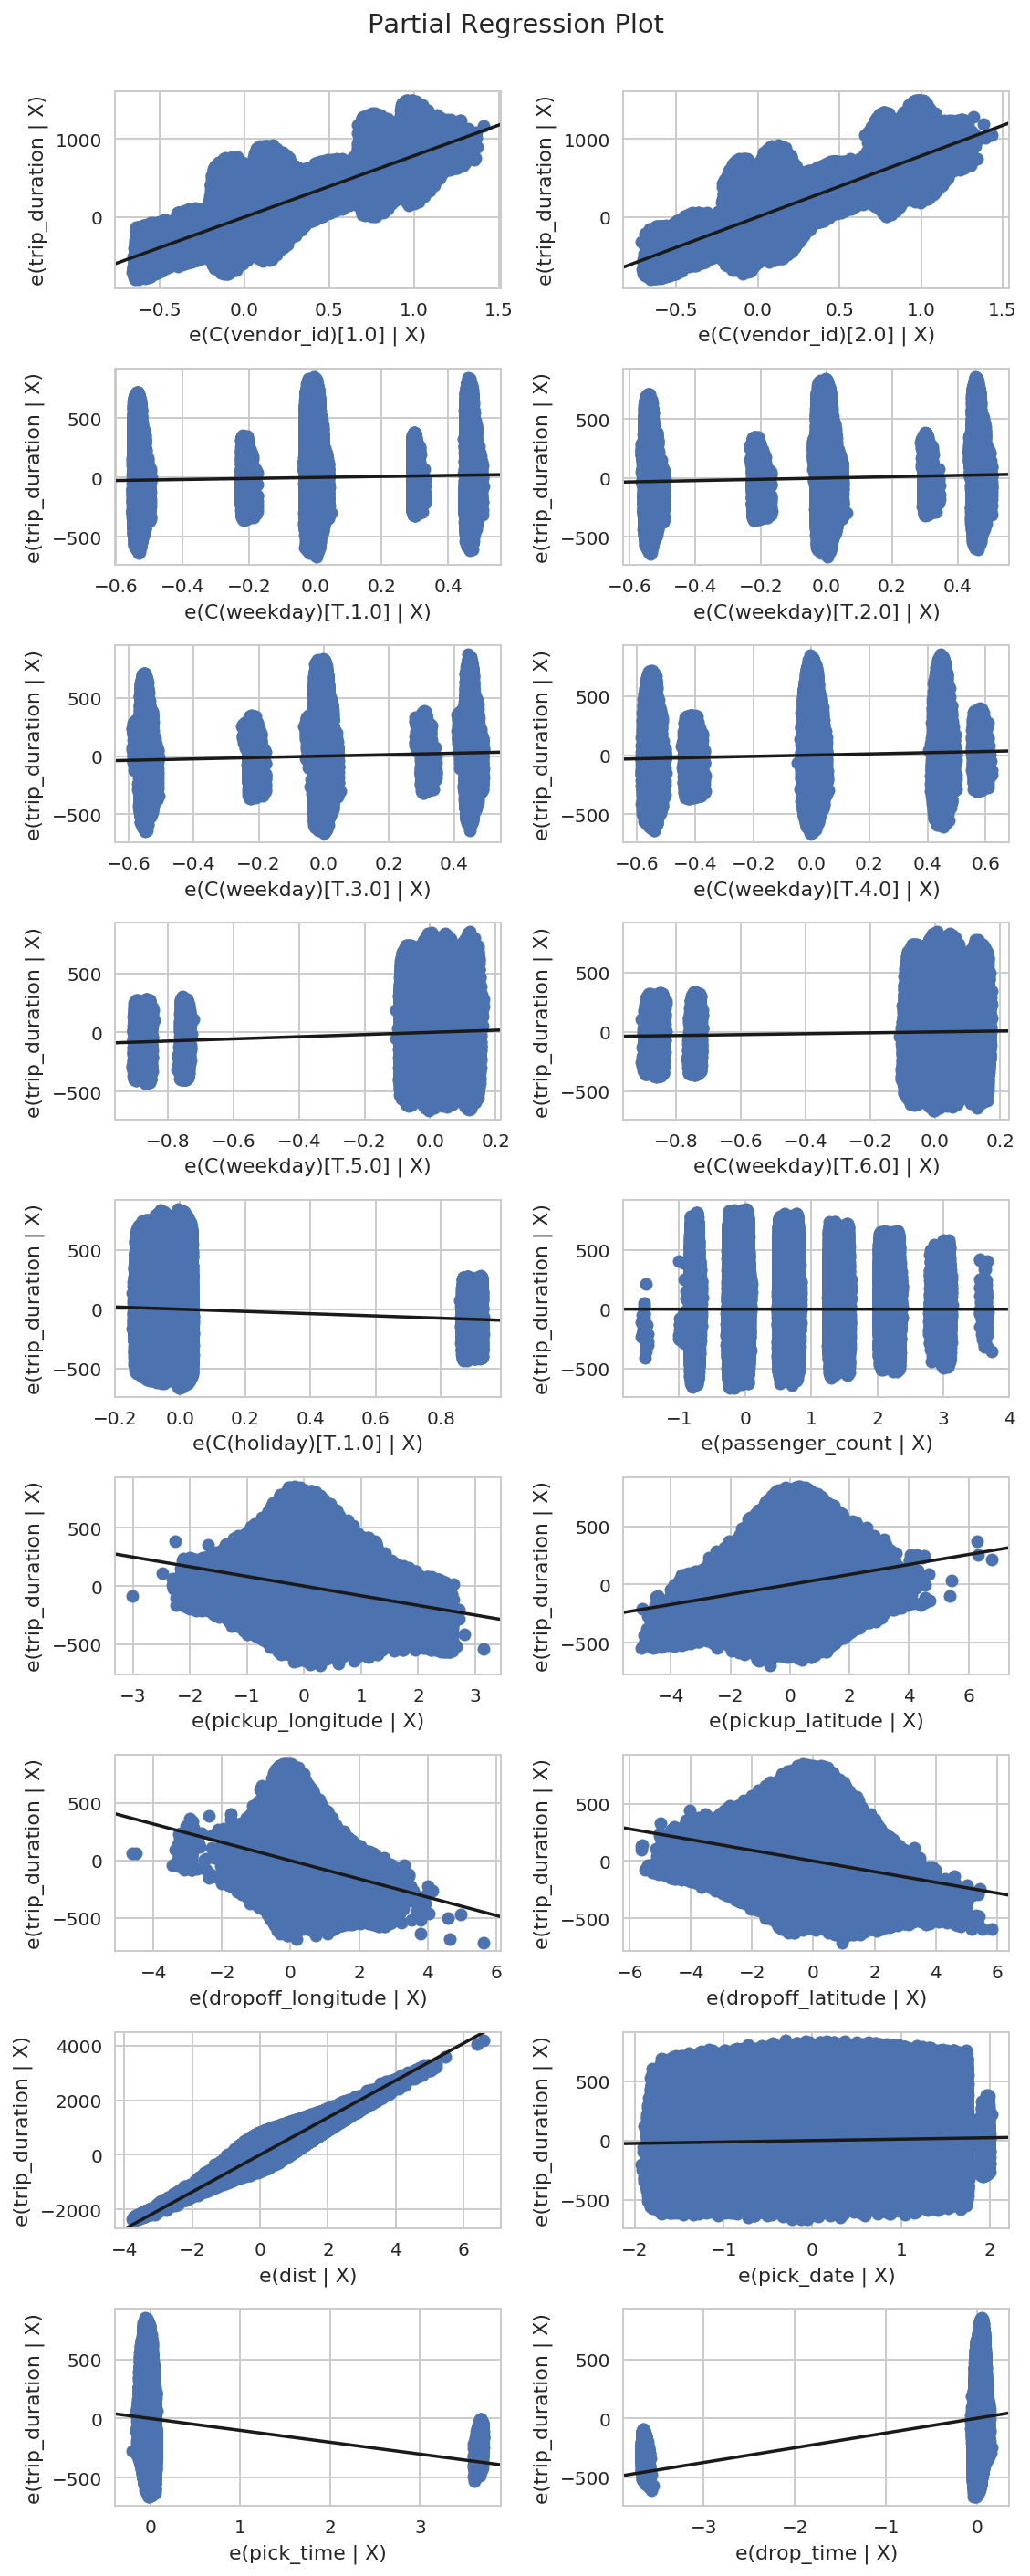

In [16]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()